In [56]:
#separating video into frames 
import cv2

# Open the .mov file
video = cv2.VideoCapture('3_sabreshort.MOV')

# Check if the video is successfully opened
if not video.isOpened():
    print("Error opening video file")

# Initialize variables
frame_count = 0

# Read and save frames until the end of the video
while video.isOpened():
    # Read the current frame
    ret, frame = video.read()

    # Check if frame is successfully read 
    if not ret:
        break

    # Save the frame as an image file
    frame_filename = f"sframe_{frame_count}.jpg"
    cv2.imwrite(frame_filename, frame)

    # Increment frame count
    frame_count += 1

    # Display the current frame (optional)
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video object and close any open windows
video.release()
cv2.destroyAllWindows()

In [124]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline
import math

started
out of loop


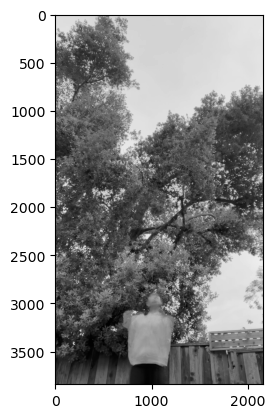

finished


In [135]:
#creating median image used to compare 
print('started') 
im = cv2.imread('sframe_0.jpg')
list_of_frames = []
for frame_number in range (0, frame_count): 
    im_temp = cv2.imread('sframe_'+str(frame_number)+'.jpg')
    im_rgb = cv2.cvtColor(im_temp, cv2.COLOR_BGR2GRAY)
    list_of_frames += [im_rgb]
print('out of loop')
images = np.stack(list_of_frames, axis=0)
median_image = np.median(images, axis=0).astype(np.uint8) #long one 
plt.imshow(median_image, cmap = "gray")
plt.show() 
print('finished') 


In [126]:
#functions to draw lines 
def draw_lines(img, houghLines, color=[0, 255, 0], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            
 
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)   

 
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [157]:
#find where to cut video off (int cutoff parameter)
def find_cutoff():
    im_temp = cv2.imread('sframe_'+str('1')+'.jpg')
    im_gray = cv2.cvtColor(im_temp, cv2.COLOR_BGR2GRAY)
    value_collector = np.zeros(im_gray.shape)
    for i in range(im_gray.shape[0]):
        for j in range(im_gray.shape[1]):
            if np.abs(float(median_image[i][j]) - float(im_gray[i][j])) < 50: 
                value_collector[i][j] = 0 
            else:
                value_collector[i][j] = 255 
    black_rows = 0
    percent = -1
    cutoff = -1 
    catalyst = 0; 
    for i in range(value_collector.shape[0]-1, 0, -1):
        old_percent = percent 
        num_black = 0.0
        for j in range(value_collector.shape[1]): 
            if value_collector[i][j] == 0:
                num_black+=1.0
        percent = num_black/value_collector.shape[1]
        #print(percent, i) 
        if percent < 0.91:
            catalyst = 1 
        if percent > 0.97 and catalyst == 1: 
            black_rows +=1
            #print(old_percent, percent, i) 
        else: 
            black_rows = 0 
        if black_rows > 100:
            cutoff = i
            #print('Stopped correctly')
            break
    print(cutoff)
    return cutoff 

In [159]:
#all code with loop, only shows final image and returns list of angles
def get_angles(a, b, cutoff): 
    angles = [] 
    if((b-a)<100):
        print("Estimated Time: %d seconds" %((b-a)*5.5))
    else:
        print("Please shorten your video")
        return [-1] 
    for i in range (a ,b): 
        im_temp = cv2.imread('sframe_'+str(i)+'.jpg')[:cutoff,:]
        im_gray = cv2.cvtColor(im_temp, cv2.COLOR_BGR2GRAY)
        value_collector = np.zeros(im_gray.shape)
        for i in range(im_gray.shape[0]):
            for j in range(im_gray.shape[1]):
                if np.abs(float(median_image[i][j]) - float(im_gray[i][j])) < 50: 
                    value_collector[i][j] = 0 
                else:
                    value_collector[i][j] = 255 
        #plt.imshow(value_collector, cmap = "gray")
        #plt.show() 
        u8_image = value_collector.astype(np.uint8)
        im_rgb = cv2.cvtColor(im_temp, cv2.COLOR_BGR2RGB)
        rho_resolution = 1
        theta_resolution = np.pi/180
        
       

        for threshold in range(800, 200, -5):
            hough_lines = cv2.HoughLines(u8_image, rho_resolution , theta_resolution , threshold)
            if isinstance(hough_lines, np.ndarray):
                #print("threshold is %d"%threshold)
                break

        
        hough_lines_image = np.zeros_like(im_temp)
        if hough_lines is not None:
            draw_lines(hough_lines_image, hough_lines)
            for line in hough_lines:
                for rho,theta in line:
                    angles.append(theta)
        original_image_with_hough_lines = weighted_img(hough_lines_image,im_rgb)
        #plt.imshow(original_image_with_hough_lines, cmap='gray') 
        #plt.show()
    print("Done analyzing frames")
    return angles


Stopped correctly
2975 0.7851851851851852
Estimated Time: 148 seconds
Done analyzing frames
[0.99483764, 3.0019662, 2.1118484, 1.4660766, 0.5235988, 2.4958208, 1.7976891, 1.1868238, 0.05235988, 2.0594885, 1.4835298, 0.7853982, 2.6703537, 1.8675023, 1.3089969, 0.34906584, 2.3561945, 2.3561945, 1.6580628, 0.9250245, 3.0717795, 2.1293018, 2.1293018, 2.1118484, 2.1293018, 2.146755, 2.146755, 1.43117, 1.43117, 1.4137167, 1.4486233, 0.5934119, 2.740167, 1.6580628, 2.3561945, 2.3561945, 2.3561945, 2.3561945]
7.0 3.0


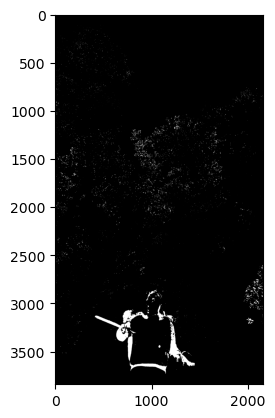

In [167]:
#analyzing the list of angles
#find starting and ending frame to reduce run time
cut = find_cutoff()
all_angles = get_angles(17, frame_count, cut) 
print(all_angles)
storage = all_angles[0] 
temp_count = 0.0 
rot_count = 0.0 
for ang in all_angles:
    if (float(storage) < 1.0 and float(ang) > 2.0) or (float(ang)==0.0): 
        temp_count+=1.0
    storage = ang 
rot_count = (temp_count/2.0) - 0.5
print(temp_count, rot_count)
#print("You did %d rotation(s)!"%rot_count) 


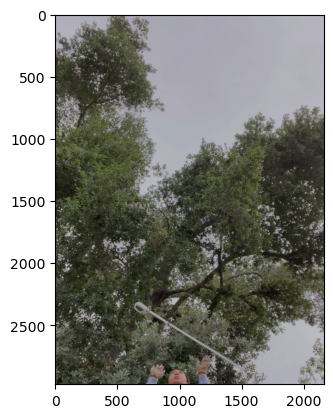

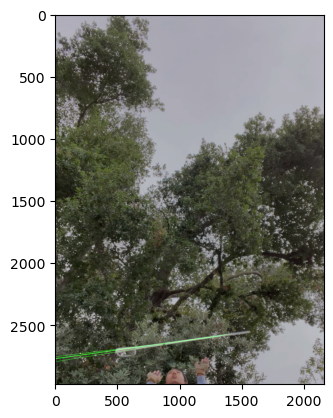

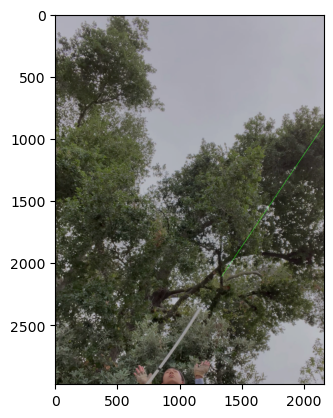

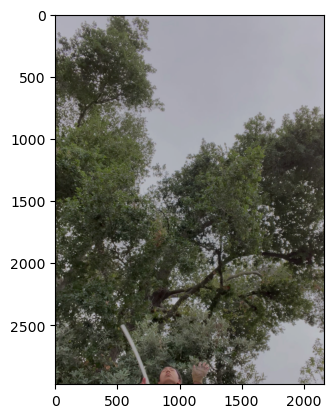

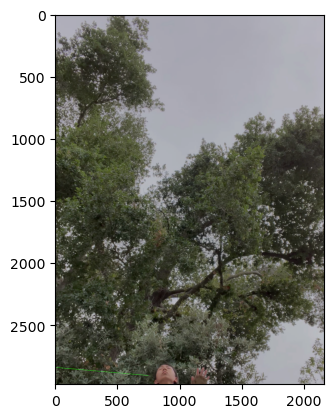

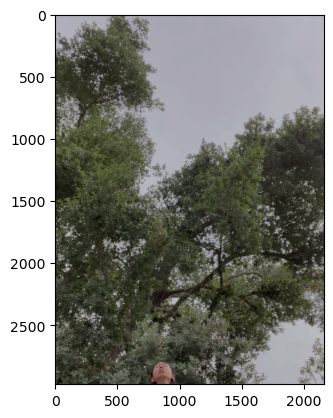

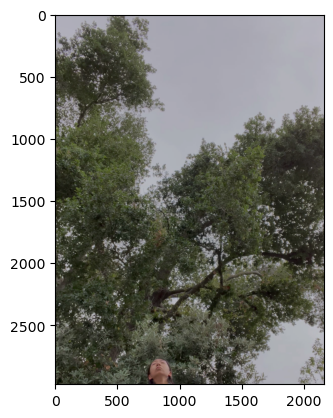

[1.4660766, 0.5235988, 2.4958208, 1.7976891, 1.1868238, 0.05235988, 2.0594885, 1.4835298, 0.7853982, 2.6703537, 1.4835298, 0.7853982, 2.6703537, 1.8675023, 1.3089969, 0.34906584, 1.4835298, 0.7853982, 2.6703537, 1.8675023, 1.3089969, 0.34906584, 2.3561945, 2.3561945, 1.6580628, 0.9250245, 3.0717795, 2.1293018, 2.1293018, 2.1118484, 2.1293018, 2.146755, 2.146755, 1.43117, 1.43117, 1.4137167, 1.4486233, 0.5934119, 2.740167, 1.6580628, 2.3561945, 2.3561945, 2.3561945, 2.3561945]


In [165]:
#debug cell
for i in range(37,44):
    im_temp = cv2.imread('sframe_'+str(i)+'.jpg')[:cutoff,:]
    im_gray = cv2.cvtColor(im_temp, cv2.COLOR_BGR2GRAY)
    value_collector = np.zeros(im_gray.shape)
    for i in range(im_gray.shape[0]):
        for j in range(im_gray.shape[1]):
            if np.abs(float(median_image[i][j]) - float(im_gray[i][j])) < 50: 
                value_collector[i][j] = 0 
            else:
                value_collector[i][j] = 255 
    #plt.imshow(value_collector, cmap = "gray")
    #plt.show() 
    u8_image = value_collector.astype(np.uint8)
    im_rgb = cv2.cvtColor(im_temp, cv2.COLOR_BGR2RGB)
    rho_resolution = 1
    theta_resolution = np.pi/180



    for threshold in range(800, 200, -5):
        hough_lines = cv2.HoughLines(u8_image, rho_resolution , theta_resolution , threshold)
        if isinstance(hough_lines, np.ndarray):
            #print("threshold is %d"%threshold)
            break


    hough_lines_image = np.zeros_like(im_temp)
    if hough_lines is not None:
        draw_lines(hough_lines_image, hough_lines)
        for line in hough_lines:
            for rho,theta in line:
                angles.append(theta)
    original_image_with_hough_lines = weighted_img(hough_lines_image,im_rgb)
    plt.imshow(original_image_with_hough_lines, cmap='gray') 
    plt.show()
print(angles)